# <span style=color:blue> Numerical Simulation Laboratory #
## <span style=color:blue> Exercise lecture 3 ##
### Mattia Nasi 11590A ###

## <span style=color:red> 03.1 ##
Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

the exercise consist in computing at time $t=0$ via Monte Carlo the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$ by:
1. sampling directly the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

where 
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
and when sampling discretized values
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$

I make pictures of the above shown extimations with $M = 10^5$ asset prices as functions of the number of blocks $N = 10^2$, with statistical uncertainties obtained via data blocking. The target values are calculated directly from the Black-Scholes analytic solution (shown in the Appendix).

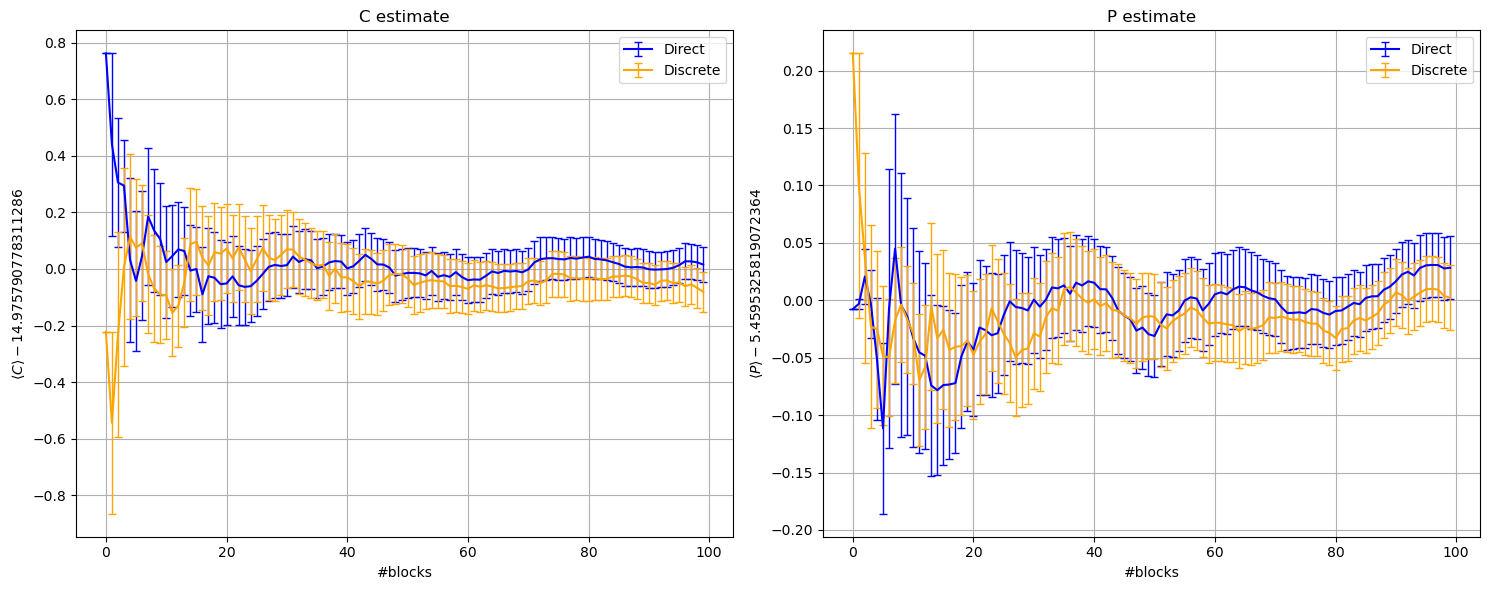

In [24]:
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(100)

mediaC, erroreC = np.loadtxt("03.1/data1.dat", usecols=(0,1), delimiter='\t', unpack='true')
mediaP, erroreP = np.loadtxt("03.1/data2.dat", usecols=(0,1), delimiter='\t', unpack='true')
mediaCdis, erroreCdis = np.loadtxt("03.1/data3.dat", usecols=(0,1), delimiter='\t', unpack='true')
mediaPdis, errorePdis = np.loadtxt("03.1/data4.dat", usecols=(0,1), delimiter='\t', unpack='true')

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].errorbar(x, mediaC - 14.975790778311286, yerr=erroreC, color='b', ecolor='b', elinewidth=1, capsize=3, label='Direct')
axs[0].errorbar(x, mediaCdis - 14.975790778311286, yerr=erroreCdis, color='orange', ecolor='orange', elinewidth=1, capsize=3, label='Discrete')
axs[0].set_title("C estimate")
axs[0].set_xlabel('#blocks')
axs[0].set_ylabel(r'$\langle C \rangle - 14.975790778311286$')
axs[0].grid(True)
axs[0].legend()

axs[1].errorbar(x, mediaP - 5.4595325819072364, yerr=erroreP, color='b', ecolor='b', elinewidth=1, capsize=3, label='Direct')
axs[1].errorbar(x, mediaPdis - 5.4595325819072364, yerr=errorePdis, color='orange', ecolor='orange', elinewidth=1, capsize=3, label='Discrete')
axs[1].set_title("P estimate")
axs[1].set_xlabel('#blocks')
axs[1].set_ylabel(r'$\langle P \rangle - 5.4595325819072364$')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


As shown above bot the call and put prices converge to the analytic values predicted by the Black-Sholes solution (view Appendix) within the statistical uncertainty. The error follows the data fluctuations as expected.

## <span style=color:red> Appendix ##


In [29]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364
